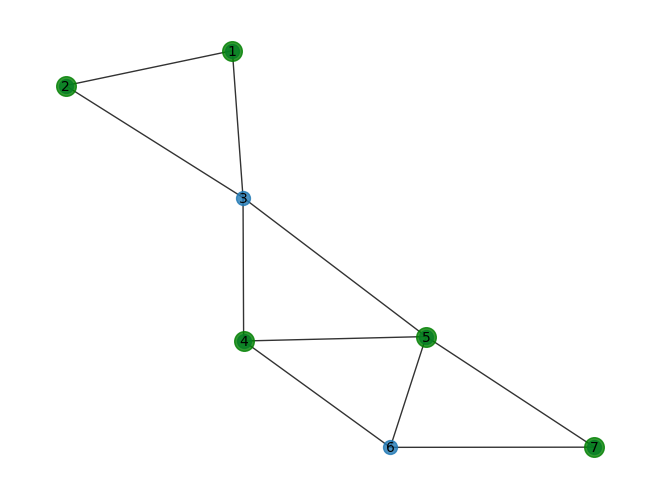

Seed nodes using LTM: [1, 2, 4, 5, 7]


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def influence_maximization_ltm(g_, k_, eta_, l_):

    def compute_spread(g_, node, thresholds):
        # Initialize set of activated nodes with starting node
        activated = set([node])

        # Iterate until no new nodes are activated
        while True:
            new_activated = False
            for u in g_.nodes():
                # Skip nodes that are already activated
                if u in activated:
                    continue

                # Compute sum of activation probabilities of neighbors
                sum_activation_prob = sum(thresholds[v] for v in g_.neighbors(u) if v in activated)

                # Activate node if the sum of activation probabilities exceeds its threshold
                if sum_activation_prob >= thresholds[u]:
                    activated.add(u)
                    new_activated = True

            if not new_activated:
                break

        return len(activated)

    seed_set = set()  # Initialize empty seed set
    for _ in range(eta_):
        # Compute threshold values for each node
        thresholds = {node: random.random() for node in g_.nodes()}

        # Compute spread for each initial node
        spread = {}
        for node in g_.nodes():
            if node not in seed_set:
                s = 0
                for _ in range(l_):
                    # Compute spread of subgraph starting from current node
                    s += compute_spread(g_, node, thresholds)

                # Compute average spread over multiple iterations
                spread[node] = s / l_

        # Add node with maximum spread to seed set
        max_node = max(spread, key=spread.get)
        seed_set.add(max_node)

    return list(seed_set)

# Rest of the code remains the same

# Define graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=100, alpha=0.8)

# Highlight seed nodes using LTM
seed_nodes_ltm = influence_maximization_ltm(G, k_=3, eta_=5, l_=10)
nx.draw_networkx_nodes(G, pos=pos, nodelist=seed_nodes_ltm, node_color='g', node_size=200, alpha=0.8)

# Add labels
labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10)

# Display graph
plt.show()

# Print seed nodes
print("Seed nodes using LTM: " + str(seed_nodes_ltm))
